# Mapping change over time (Part 2)

<img src="images/huh.png" width=600>

In the previos lab, side-by-side maps were generated to present demographic shifts over space and time. However, with large number of areas displaying minimal population shifts, these changes can be hard to detect. In order to visibly highlight specific areas where certain population groups have increased and decreased, we calcluate the total population change as well as the percent change from one time period to another.

We begin this lab by importing the `chibamesh.geojson` file that was generated in the previous lab.

‰ª•Ââç„ÅÆ„É©„Éú„Åß„ÅØ„ÄÅÁ©∫Èñì„Å®ÊôÇÈñì„Å´„Çè„Åü„Çã‰∫∫Âè£ÂãïÊÖã„ÅÆÂ§âÂåñ„ÇíÁ§∫„Åô„Åü„ÇÅ„Å´‰∏¶Âàó„Éû„ÉÉ„Éó„ÅåÁîüÊàê„Åï„Çå„Åæ„Åó„Åü„ÄÇ „Åü„Å†„Åó„ÄÅ‰∫∫Âè£„ÅÆÂ§âÂåñ„ÅåÊúÄÂ∞èÈôê„Å´Êäë„Åà„Çâ„Çå„Å¶„ÅÑ„ÇãÂú∞Âüü„ÅåÂ§öÊï∞„ÅÇ„Çã„Åü„ÇÅ„ÄÅ„Åì„Çå„Çâ„ÅÆÂ§âÂåñ„ÇíÊ§úÂá∫„Åô„Çã„ÅÆ„ÅØÈõ£„Åó„ÅÑÂ†¥Âêà„Åå„ÅÇ„Çä„Åæ„Åô„ÄÇ ÁâπÂÆö„ÅÆ‰∫∫Âè£„Ç∞„É´„Éº„Éó„ÅåÂ¢óÊ∏õ„Åó„ÅüÁâπÂÆö„ÅÆÂú∞Âüü„ÇíË¶ñË¶öÁöÑ„Å´Âº∑Ë™ø„Åô„Çã„Åü„ÇÅ„Å´„ÄÅÁ∑è‰∫∫Âè£„ÅÆÂ§âÂåñ„Å®„ÄÅ„ÅÇ„ÇãÊúüÈñì„Åã„ÇâÂà•„ÅÆÊúüÈñì„Å∏„ÅÆÂ§âÂåñÁéá„ÇíË®àÁÆó„Åó„Åæ„Åô„ÄÇ

„Åì„ÅÆ„É©„Éú„ÅØ„ÄÅÂâç„ÅÆ„É©„Éú„ÅßÁîüÊàê„Åï„Çå„Åü„Äåchibamesh.geojson„Äç„Éï„Ç°„Ç§„É´„Çí„Ç§„É≥„Éù„Éº„Éà„Åô„Çã„Åì„Å®„Åã„ÇâÂßã„ÇÅ„Åæ„Åô„ÄÇ

## Libraries

In [4]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
#mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')


### „É°„ÉÉ„Ç∑„É•„Çí„Ç§„É≥„Éù„Éº„Éà

In [2]:
# Á©∫Èñì„Éá„Éº„Çø„Å™„ÅÆ„Åß geopandas (gpd) „Åß„Ç§„É≥„Éù„Éº„Éà
chibamesh = gpd.read_file('data/chibamesh.geojson')

## Map time


In [5]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
chibamesh.plot(ax = ax[0], # Â∑¶„ÅÆ„Éû„ÉÉ„Éó
    column='T000846001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=15000)

# 2020 population
chibamesh.plot(ax = ax[1], # Âè≥„ÅÆ„Éû„ÉÉ„Éó
    column='T001100001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=15000)

# hide axes
ax[0].axis('off') # Â∑¶
ax[1].axis('off') # Âè≥

# title
ax[0].set_title('2015 ‰∫∫Âè£Á∑èÊï∞',fontsize=24); # Â∑¶
ax[1].set_title('2020 ‰∫∫Âè£Á∑èÊï∞',fontsize=24); # Âè≥

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = chibamesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # Â∑¶
ax[0].set_ylim(ymin, ymax) # Â∑¶ 
ax[1].set_xlim(xmin, xmax) # Âè≥
ax[1].set_ylim(ymin, ymax) # Âè≥

# „Çµ„Éñ„Éó„É≠„ÉÉ„ÉàÈñì„ÅÆ„Çπ„Éö„Éº„Çπ„ÇíË™øÊï¥
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # Â∑¶
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # Âè≥

# Create a new field for population change
These are beautiful side by side maps. However, one can hardly tell the difference between them! One way to show the difference between data from different time periods is to calculate the difference between them. To do so:

- create a new field `pop_change_2015_2020`
- create a new field `pop_percent_change_2015_2020`
- calculate the population change (difference) between 2015 and 2020
- calculate the population percent change (difference) between 2015 and 2020
- map the new field

Ê®™‰∏¶„Å≥„ÅÆÁæé„Åó„ÅÑÂú∞Âõ≥„Åå„Åß„Åç„Åü„Å≠„ÄÇ „Åß„ÇÇ„ÄÅÈÅï„ÅÑ„ÇíÂå∫Âà•„Åô„Çã„Åì„Å®„ÅØ„Åª„Å®„Çì„Å©„Åß„Åç„Å™„ÅÑ„ÄÇ Áï∞„Å™„ÇãÊúüÈñì„ÅÆ„Éá„Éº„ÇøÈñì„ÅÆÂ∑ÆÁï∞„ÇíÁ§∫„Åô 1 „Å§„ÅÆÊñπÊ≥ï„ÅØ„ÄÅ„Éá„Éº„ÇøÈñì„ÅÆÂ∑ÆÁï∞„ÇíË®àÁÆó„Åô„Çã„Åì„Å®„Åß„Åô„ÄÇ „Åù„ÅÜ„Åô„Çã„Åü„ÇÅ„Å´Ôºö

- Êñ∞„Åó„ÅÑ„Éï„Ç£„Éº„É´„Éâ„Äåpop_change_2015_2020„Äç„Çí‰ΩúÊàê„Åô„Çã
- 2015Âπ¥„Å®2020Âπ¥„ÅÆ‰∫∫Âè£Â§âÂåñÔºàÂ∑ÆÔºâ„ÇíË®àÁÆó„Åô„Çã
- Êñ∞„Åó„ÅÑ„Éï„Ç£„Éº„É´„Éâ„Çí„Éû„ÉÉ„Éó„Åô„Çã

In [6]:
# create a new field with null values
chibamesh['pop_change_2015_2020'] = np.nan
chibamesh['pop_percent_change_2015_2020'] = np.nan

## ÂïèÈ°å

üßê„ÄÄ„Åæ„Åö„ÅØËÄÉ„Åà„Çà„ÅÜ„ÄÇ„Å™„Åú„Äê‰∫∫Âè£Êé®Áßª„Äë(population change) „Å®„Äê‰∫∫Âè£Ââ≤Âêà„ÅÆÂ§âÂåñ„Äë(population percent change) „Çí‰∏°ÊñπË®àÁÆó„Åô„ÇãÂøÖË¶Å„Åå„ÅÇ„Çã„ÅÆÔºü

„Åß„ÅØ„ÄÅ‰∏ã„ÅÆ„Ç≥„Éº„Éâ„Çª„É´„ÅßÊ¨°„ÅÆ‰∫å„Å§„ÅÆË®àÁÆó„Çí„Åó„Åæ„Åó„Çá„ÅÜ„ÄÇ

- 2015 Âπ¥„Åã„Çâ 2020 Âπ¥„Åæ„Åß„ÅÆÁ∑è‰∫∫Âè£„ÅÆÁµ∂ÂØæÂ§âÂåñ„ÅÆË®àÁÆó
- 2015 Âπ¥„Åã„Çâ 2020 Âπ¥„Åæ„Åß„ÅÆÁ∑è‰∫∫Âè£„ÅÆÂ§âÂåñÁéá„ÅÆË®àÁÆó

„Éí„É≥„ÉàÔºö
- 2015Âπ¥Ôºö`T000846001`
- 2020Âπ¥Ôºö`T001100001`

„Å™„Åä„ÄÅÂºè„ÅÆÊúÄÂàù„ÅÆÈÉ®ÂàÜ„ÅØÊó¢„Å´Ë®òÂÖ•„Åï„Çå„Å¶„Åæ„Åô„ÄÇ

In [7]:
# calculate population change „Äê‰∫∫Âè£Êé®Áßª„Äë
chibamesh['pop_change_2015_2020']=chibamesh['T001100001']-chibamesh['T000846001']

In [8]:
# calculate population percent change„Äê‰∫∫Âè£Ââ≤Âêà„ÅÆÂ§âÂåñ„Äë
chibamesh['pop_percent_change_2015_2020']=chibamesh['pop_change_2015_2020']/chibamesh['T000846001']*100

In [9]:
# check!
chibamesh[['KEY_CODE','T000846001','T001100001','pop_change_2015_2020','pop_percent_change_2015_2020']].sample(5)

KEY_CODE  T000846001  T001100001  pop_change_2015_2020   
217   52393086.0         5.0        12.0                   7.0  \
472   52394740.0        51.0        40.0                 -11.0   
7579  53402375.0       228.0       215.0                 -13.0   
8659  53405032.0      5298.0      5371.0                  73.0   
6494  53397599.0      3151.0      3303.0                 152.0   

      pop_percent_change_2015_2020  
217                     140.000000  
472                     -21.568627  
7579                     -5.701754  
8659                      1.377878  
6494                      4.823865

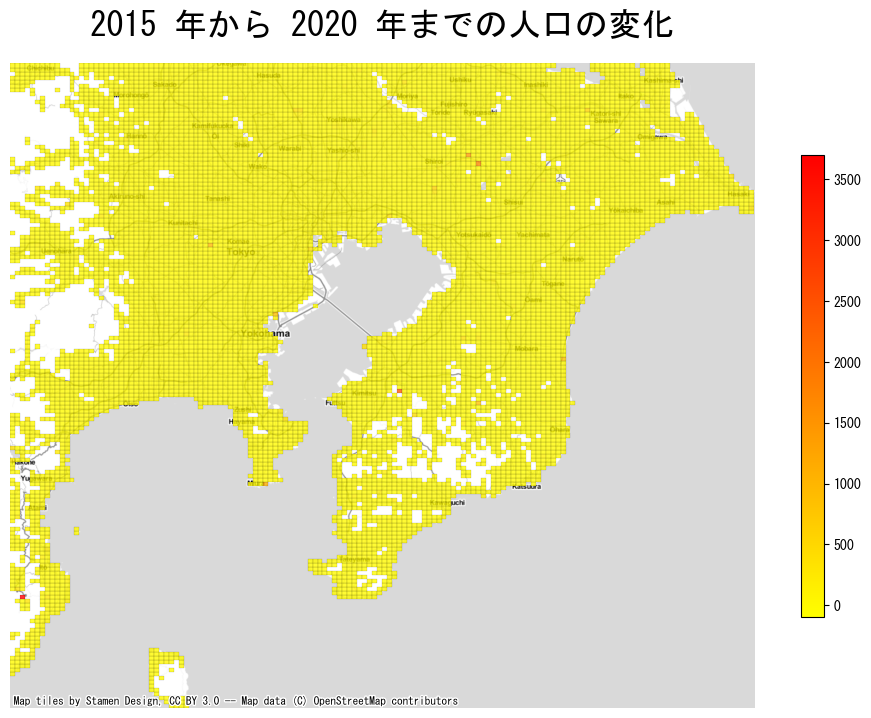

In [10]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12)) # ‰∏Ä„Å§„ÅÆ„Éû„ÉÉ„Éó„Å™„ÅÆ„Åßnrows,ncols=1

# 2015-2020 population change
chibamesh.plot(ax = ax,
        column='pop_percent_change_2015_2020',
        legend=True,
        legend_kwds={'shrink': 0.5},
        cmap='autumn_r',
        edgecolor='black',
        linewidth=0.1,
        alpha=0.8,)

# hide axes
ax.axis('off')

# title
ax.set_title('2015 Âπ¥„Åã„Çâ 2020 Âπ¥„Åæ„Åß„ÅÆ‰∫∫Âè£„ÅÆÂ§âÂåñ',fontsize=24, pad=20);

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = chibamesh.total_bounds

# Set the plot limits based on the total bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

This map is not very legible. How can we make it better? With maps that show positive and negative values, we use a divergent color scheme. Furthermore, in order to set the neutral color at the middle, we make sure to make the vmin and vmax values equal.

„Åì„ÅÆÂú∞Âõ≥„ÅØ„Åô„Åî„ÅèË™≠„Åø„Å´„Åè„ÅÑ„Åß„Åô„ÄÇ „Å©„ÅÜ„Åô„Çå„Å∞ÊîπÂñÑ„Åß„Åç„Çã„Åß„Åó„Çá„ÅÜ„Åã? Ê≠£„ÅÆÂÄ§„Å®Ë≤†„ÅÆÂÄ§„ÇíÁ§∫„Åô„Éû„ÉÉ„Éó„Åß„ÅØ„ÄÅdivergent „Ç´„É©„Éº „Çπ„Ç≠„Éº„É†„Çí‰ΩøÁî®„Åó„Åæ„Åô„ÄÇ „Åï„Çâ„Å´„ÄÅ‰∏≠ÈñìËâ≤„ÇíË®≠ÂÆö„Åô„Çã„Åü„ÇÅ„Å´„ÄÅvmin „Å® vmax „ÅÆÂÄ§„ÅåÂêå„Åò„Å´„Å™„Çã„Çà„ÅÜ„Å´„Åó„Åæ„Åô„ÄÇ

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week11/images/diverging.png" width=500>


Single map:

In [14]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

# 2015-2020 population change
chibamesh.plot(ax = ax,
    column='pop_change_2015_2020',
         legend=True,
         legend_kwds={'shrink': 0.5},
         cmap='seismic',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=-75, # vmin„Å®vmax„ÅåÂêå„Åò„Åì„Å®„Å´„Çà„Å£„Å¶„ÄÅ‰∏≠ÈñìÂÄ§„Åå„Çº„É≠„Å´„Å™„Çã
         vmax=75
         )

# hide axes
ax.axis('off')

# title
ax.set_title('Êù±‰∫¨„ÉªÂçÉËëâ 2015-2020 ‰∫∫Âè£„ÅÆÂ§âÂåñ',fontsize=30, pad=20)

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = chibamesh.total_bounds

# Set the plot limits based on the total bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# „Çµ„Éñ„Éó„É≠„ÉÉ„ÉàÈñì„ÅÆ„Çπ„Éö„Éº„Çπ„ÇíË™øÊï¥
plt.tight_layout()

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)


Side-by-side maps:

In [16]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
chibamesh.plot(ax = ax[0], # Â∑¶„ÅÆ„Éû„ÉÉ„Éó
    column='pop_change_2015_2020',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='seismic',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=-1000, # vmin„Å®vmax„ÅåÂêå„Åò„Åì„Å®„Å´„Çà„Å£„Å¶„ÄÅ‰∏≠ÈñìÂÄ§„Åå„Çº„É≠„Å´„Å™„Çã
         vmax=1000
)

# 2020 population
chibamesh.plot(ax = ax[1], # Âè≥„ÅÆ„Éû„ÉÉ„Éó
    column='pop_percent_change_2015_2020',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='seismic',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=-75, # vmin„Å®vmax„ÅåÂêå„Åò„Åì„Å®„Å´„Çà„Å£„Å¶„ÄÅ‰∏≠ÈñìÂÄ§„Åå„Çº„É≠„Å´„Å™„Çã
         vmax=75
)

# hide axes
ax[0].axis('off') # Â∑¶
ax[1].axis('off') # Âè≥

# title
ax[0].set_title('2015 Âπ¥„Åã„Çâ 2020 Âπ¥„Åæ„Åß„ÅÆ‰∫∫Âè£„ÅÆÁµ∂ÂØæÊï∞Â§âÂåñ',fontsize=24); # Â∑¶
ax[1].set_title('2015 Âπ¥„Åã„Çâ 2020 Âπ¥„Åæ„Åß„ÅÆ‰∫∫Âè£Ââ≤Âêà„ÅÆÂ§âÂåñ',fontsize=24); # Âè≥

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = chibamesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # Â∑¶
ax[0].set_ylim(ymin, ymax) # Â∑¶ 
ax[1].set_xlim(xmin, xmax) # Âè≥
ax[1].set_ylim(ymin, ymax) # Âè≥

# „Çµ„Éñ„Éó„É≠„ÉÉ„ÉàÈñì„ÅÆ„Çπ„Éö„Éº„Çπ„ÇíË™øÊï¥
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # Â∑¶
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # Âè≥